# Vocabulary Analysis Workshop

## Introduction

In the initial analysis of a data set it is useful to gather informative summaries. This includes evaluating the available fields, by finding unique counts or by calculating summary statistics such as averages for numerical fields. These summaries help in understanding what is in the data itself, the underlying quality, and illuminate potential paths for further exploration. In structured data, this a straightforward task, but for unstructured text, different types of summaries are needed. 

Some useful examples for text data include a count of the number of documents in which a term occurs, and the number of times a term occurs in a document. It is still up to use figure out what a _term_ is, and how to extract it from the text.

Since vocabulary terms often have variant forms, e.g. “performs” and “performing”, it is useful to pre-process and combine these forms before computing distributions. 

Oftentimes, we want to look at sequences of words, for example we may want to count the number of times “data science” occurs, and not just “data” and “science”. 

We will use the pandas Python Data Analysis Library and the Natural Language Toolkit (NLTK) to process a data set of job descriptions posted by employers in the United States, and look at the difference in vocabularies across different job segments.

<img alt="NLTK book" src="http://covers.oreilly.com/images/9780596516499/cat.gif" align="left" float="left"/>  
**(NLTK [wikipedia](https://en.wikipedia.org/wiki/Natural_Language_Toolkit))**  
<img alt="Pandas" src="http://pandas.pydata.org/_static/pandas_logo.png" align="left" float="left"/>  
**(pandas [wikipedia](https://en.wikipedia.org/wiki/Pandas_(software))**

### Outline

#### 0. [Introduction](0. Introduction.ipynb)  
   In this section we will cover the outline and motivation of the tutorial, as well as introduce the data set we will be using.
#### 1. [Tokenization](1. Tokenization.ipynb)  
   In this section we will cover tokenization. (exercise 1)
#### 2. [TF.IDF](2. TF.IDF.ipynb)  
   In this section we will cover how to look at vocabulary with TF.IDF.
#### 3. [Visualization](3. Visualization.ipynb)  
   In this section we will cover how to visualize our vocabulary with TF.IDF.
#### 4. [Stemming and Lemmatization](4. Stemming and Lemmatization)  
   In this section we will cover stemming and lemmatization to normalize our vocabulary. (exercise 2)
#### 5. [Stop Words](5. Stop Words.ipynb)  
   In this section we will cover removal of "less useful" words. (exercise 3)
#### 6. [n-Grams](6. n-Grams.ipynb)  
   In this section we will cover word sequences and introduce sentence boundary detection.
#### 7. [Modeling](7. Modeling.ipynb)  
   In this section we will cover using our analysis to build models for predicting our segments. (exercise 4)

### NLP - fishing for meaning

An analogy I like to use when talking about NLP is looking forfishing.

All of the techniques we will cover in this talk can (and should) be tuned to the particular language, data, and problem that is being examined. If you are trying to find a sunfish you don't want to go buy all the equipment looking going down to the midnight zone. Similarly, if you are looking for angler fish, you will not find them by just looking at the surface.

<img src="https://www.nwf.org/~/media/Content/Screen%20Captures/Kids/Ranger-Rick-Spreads/ocean2-JJ2014.ashx"/>

[[National Wildlife Kids - Ocean Animals](https://www.nwf.org/Kids/Ranger-Rick/Animals/Mixture-of-Species/Ocean-Animals.aspx)]

We are looking to do exploratory analysis here, so we are looking at the surface.

In [1]:
from __future__ import division, print_function

%matplotlib inline

from matplotlib import pyplot as plt
import pandas as pd

### Data

The data we will be looking at is from a HackerRank competition Indeed had earlier this year. It contains the text of some job descriptions as well as some other attributes.

**Columns**
- id: a generated ID for each job description
- description: the employer entered job description text
- experience: the number of years experience required for the job, (5+, 2-5, 1-2, none)
- education: the education level required for the job, (ms-or-phd-needed, bs-degree-needed, associate-needed, none)
- is_hourly: true if the job is hourly, false if it is a salary job
- is_part_time: true if the job is part-time, false if the job is full-time
- is_supervisor: true if the job is a supervisor-position, false otherwise

In [2]:
jobs_df = pd.read_csv('data/job_descriptions.tsv', sep='\t', encoding='UTF-8', index_col=0)

In [3]:
jobs_df

,description,experience,education,is_hourly,is_part_time,is_supervisor
id,,,,,,
0,THE COMPANY Employer is a midstream service...,5+,none,False,False,True
1,ICR Staffing is now accepting resumes for Indu...,2-5,none,False,False,False
2,This is a great position for the right person....,none,none,False,True,False
3,A large multi-specialty health center is expan...,none,none,False,False,False
4,JOB PURPOSE: The Account Director is respon...,5+,bs-degree-needed,False,False,True
5,"At Cottage Health System, our facilities are s...",5+,associate-needed,False,False,False
6,*E Learning Instructional Designer with at lea...,5+,ms-or-phd-needed,False,False,False
7,Sales and Service Representative SAF-Hollan...,5+,bs-degree-needed,False,False,False
8,"SAF-Holland, Inc. is currently seeking an Inte...",2-5,bs-degree-needed,False,False,False


In [4]:
len(jobs_df)

4375

Exploring and summarizing structured data is something most of us are familiar with. If the data is categorical or boolean we can report percentages, and display a pie chart for the values. This gives us a pretty good idea of the data.

For numeric columns we can look at the mean and standard deviation, as well as look at percentiles. We can bin the values and plot a histogram.

### How do we explore and summarize text?  
Let's try looking at character length of documents, and use our knowledge of how to explore numeric data.

count     4375.000000
mean      1788.295314
std       1319.519949
min         96.000000
25%        852.000000
50%       1499.000000
75%       2384.000000
max      17278.000000
Name: description, dtype: float64


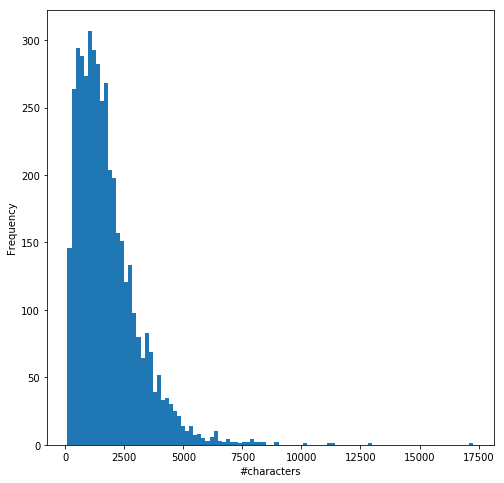

In [5]:
character_lengths = jobs_df['description'].apply(len)
print(character_lengths.describe())
plt.figure(figsize=(8, 8))
character_lengths.plot(kind='hist', bins=100)
plt.xlabel('#characters')
plt.show()

Do you feel you have an understanding of the text now?  
Let's look at just the alphanumeric characters.

count     4375.000000
mean      1451.384686
std       1079.303229
min         76.000000
25%        687.000000
50%       1209.000000
75%       1937.000000
max      14081.000000
Name: description, dtype: float64


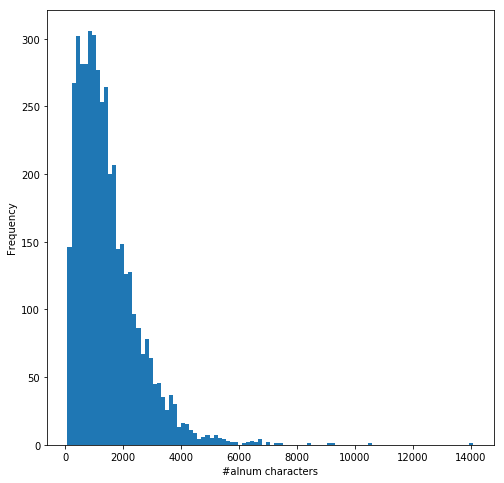

In [6]:
alnum_lengths = jobs_df['description'].apply(lambda d: len([c for c in d if c.isalnum()]))
print(alnum_lengths.describe())
plt.figure(figsize=(8, 8))
alnum_lengths.plot(kind='hist', bins=100)
plt.xlabel('#alnum characters')
plt.show()

Clearly, this kind of approach does not give us a satisfying summary of the text data.

In structured data, the meaning of the values is apparent from the column name (and description) and the value itself. The meaning of text though is more complicated, so we must do some processing in order to explore it.

The meaning of a text is a combination of the words, their order, and the context they are in. (**Note**: this is a gross oversimplification). How do we look at these things without doing complicated natural language processing?

- Words: We can get to these by splitting the text into words (tokens actually, a _word_ is more a complicated concept) in a process called tokenization. We can process these words to further explore the data.
- Order: We don't want to parse the text in the exploratory phase, but we can look at common small sequences of words. These small sequences are called _n-grams_.
- Context: The structured data in our data set gives us natural ways to segment the data. So we know the overall context, job descriptions in the United States, and now we can get even narrower context.

The way which we use these techniques depends on the problem at hand. In this workshop we will build towards building models to predict the segments to which a job description belong. We will be using text based features to make our predictions.

Here are some questions that we want to answer in our analysis.

- How should we want to process the text?
- Is the text sufficient for making predictions about which segments 

Let's look at a few example jobs.

In [7]:
for jdid, row in jobs_df.sample(n=3, random_state=123).iterrows():
    print('=' * 80)
    print('id = ', jdid)
    print('=' * 30)
    print(row.description)
    print('=' * 80)

id =  2742
Fleming Development Incorporated (FDI) owns and operates multiple real estate developments throughout Dane County and the State of Wisconsin.  Our portfolio includes a fantastic corporate team based in Fitchburg; Greenscapes Landscape Design and Maintenance based in Dane County; and 8 Sylvan Crossings Assisted Living facilities throughout Wisconsin, 3 of which are in Dane County.  We offer the ability to work in an entrepreneurial environment with a competitive benefits and compensation package.  To learn more about each of our entities, please visit our websites: greenscapesmadison.com and sylvancrossings.com.   We are a culture that focuses on training and development for high performers with a philosophy to promote from within.  Our entrepreneurial spirit fosters an environment of idea sharing, process improvement and increased profits.  Does this sound like a team you would like to be a member of?    We are currently looking for a Property Manager to be based out of our 

### NEXT =>  [1. Tokenization](1. Tokenization.ipynb)